In [1]:
import pandas as pd

In [5]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
df_train_cleaned = df_train.copy()
df_test_cleaned = df_test.copy()

In [7]:
df_train_cleaned = df_train_cleaned.drop(['id'], axis=1)

In [8]:
target_column = 'class'
categorical_columns = df_train_cleaned.select_dtypes(include=['object']).columns.drop(target_column)
numerical_columns = df_train_cleaned.select_dtypes(exclude=['object']).columns.drop(target_column, errors='ignore')


print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: class

Categorical Columns: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

Numerical Columns: ['cap-diameter', 'stem-height', 'stem-width']


In [9]:
def replace_infrequent_categories(df, column, threshold=70):
    value_counts = df[column].value_counts()
    infrequent = value_counts[value_counts <= threshold].index
    df[column] = df[column].apply(lambda x: "Unknown" if x in infrequent else x)
    return df

for col in categorical_columns:
    df_train_cleaned = replace_infrequent_categories(df_train_cleaned, col)
    df_test_cleaned = replace_infrequent_categories(df_test_cleaned, col)


for column in categorical_columns:
    print("After a replacement:")
    num_unique = df_train_cleaned[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
After a replacement:
'cap-shape' has 8 unique categories.
'cap-surface' has 14 unique categories.
'cap-color' has 13 unique categories.
'does-bruise-or-bleed' has 3 unique categories.
'gill-attachment' has 9 unique categories.
'gill-spacing' has 4 unique categories.
'gill-color' has 13 unique categories.
'stem-root' has 6 unique categories.
'stem-surface' has 9 unique categories.
'stem-color' has 14 unique categories.
'veil-type' has 2 unique categories.
'veil-color' has 7 unique categories.
'has-ring' has 3 unique categories.
'ring-type' has 10 unique categories.
'spore-print-color' has 8 unique categories.
'habitat' has 9 unique categories.
'season' has 

In [10]:
medians = df_train_cleaned[numerical_columns].median()

df_train_cleaned[numerical_columns] = df_train_cleaned[numerical_columns].fillna(medians)
df_test_cleaned[numerical_columns] = df_test_cleaned[numerical_columns].fillna(medians)

In [11]:
df_train_cleaned = df_train_cleaned.fillna("Unknown")
df_test_cleaned = df_test_cleaned.fillna("Unknown")

In [12]:
df_train_cleaned = df_train_cleaned.drop_duplicates()

In [13]:
df_train_cleaned

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,Unknown,y,o,Unknown,Unknown,t,z,Unknown,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,Unknown,s,n,Unknown,Unknown,f,f,Unknown,l,w
3,e,3.88,f,y,g,f,s,Unknown,g,4.16,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,d,u
4,e,5.85,x,l,w,f,d,Unknown,w,3.37,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,Unknown,n,t,Unknown,Unknown,w,12.14,...,b,Unknown,w,u,w,t,g,Unknown,d,u
3116941,e,10.88,s,Unknown,w,t,d,c,p,6.65,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,d,u
3116942,p,7.82,x,e,e,f,a,Unknown,w,9.51,...,Unknown,Unknown,y,Unknown,w,t,z,Unknown,d,a
3116943,e,9.45,p,i,n,t,e,Unknown,p,9.13,...,Unknown,y,w,Unknown,Unknown,t,p,Unknown,d,u


In [14]:
df_test_cleaned

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,Unknown,n,t,Unknown,Unknown,w,11.13,...,b,Unknown,w,u,w,t,g,Unknown,d,a
1,3116946,6.90,o,t,o,f,Unknown,c,y,1.27,...,Unknown,Unknown,n,Unknown,Unknown,f,f,Unknown,d,a
2,3116947,2.00,b,g,n,f,Unknown,c,n,6.18,...,Unknown,Unknown,n,Unknown,Unknown,f,f,Unknown,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,Unknown,Unknown,w,Unknown,n,t,z,Unknown,d,u
4,3116949,6.17,x,h,y,f,p,Unknown,y,6.73,...,Unknown,Unknown,y,Unknown,y,t,Unknown,Unknown,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,Unknown,Unknown,e,Unknown,Unknown,f,f,Unknown,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,Unknown,Unknown,w,Unknown,Unknown,f,f,Unknown,g,a
2077961,5194906,5.73,x,e,e,f,a,Unknown,w,6.16,...,Unknown,Unknown,y,Unknown,w,t,z,Unknown,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,Unknown,s,g,Unknown,Unknown,f,f,Unknown,d,a


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train_cleaned['class'] = label_encoder.fit_transform(df_train_cleaned['class'])

In [16]:
for col in categorical_columns:
    if 'Unknown' in df_train_cleaned[col].values:
        mode_value = df_train_cleaned[col][df_train_cleaned[col] != 'Unknown'].mode()[0]
        df_train_cleaned[col].replace('Unknown', mode_value, inplace=True)
        df_test_cleaned[col].replace('Unknown', mode_value, inplace=True)

C:\Users\emrea\AppData\Local\Temp\ipykernel_4712\2998445877.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_cleaned[col].replace('Unknown', mode_value, inplace=True)
C:\Users\emrea\AppData\Local\Temp\ipykernel_4712\2998445877.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [17]:
cap_shape_mapping = {
    "b": 1, "c": 2, "f": 3, "o": 4,
    "p": 5, "s": 6, "x": 7
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['cap-shape'] = dataset['cap-shape'].map(cap_shape_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['cap-shape'] = dataset['cap-shape'].fillna(0)

# Print a summary to confirm changes
print("Updated Training Data (first 5 rows):")
print(df_train_cleaned[['cap-shape']].head())
print("\nUpdated Test Data (first 5 rows):")
print(df_test_cleaned[['cap-shape']].head())

Updated Training Data (first 5 rows):
   cap-shape
0          3
1          7
2          3
3          3
4          7

Updated Test Data (first 5 rows):
   cap-shape
0          7
1          4
2          1
3          7
4          7


In [18]:
cap_surface_mapping = {
    "d": 1, "e": 2, "f": 3, "g": 4,"h" : 5, "i":6,
    "k": 7, "l": 8, "n": 9,"s":10,"t":11,"w":12,"y":13
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['cap-surface'] = dataset['cap-surface'].map(cap_surface_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['cap-surface'] = dataset['cap-surface'].fillna(0)

print("Updated Training Data (first 5 rows):")
print(df_train_cleaned[['cap-surface']].head())
print("\nUpdated Test Data (first 5 rows):")
print(df_test_cleaned[['cap-surface']].head())

Updated Training Data (first 5 rows):
   cap-surface
0           10
1            5
2           10
3           13
4            8

Updated Test Data (first 5 rows):
   cap-surface
0           11
1           11
2            4
3           11
4            5


In [19]:
cap_colour_mapping = {
    "b": 1, "e": 2, "g": 3, "k": 4,"l" : 5, "n":6,"o":7,
    "p": 8, "r": 9, "u": 10,"w":11,"y":12
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['cap-color'] = dataset['cap-color'].map(cap_colour_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['cap-color'] = dataset['cap-color'].fillna(0)

print("Updated Training Data (first 5 rows):")
print(df_train_cleaned[['cap-color']].head())
print("\nUpdated Test Data (first 5 rows):")
print(df_test_cleaned[['cap-color']].head())

Updated Training Data (first 5 rows):
   cap-color
0         10
1          7
2          1
3          3
4         11

Updated Test Data (first 5 rows):
   cap-color
0          6
1          7
2          6
3          6
4         12


In [20]:
bOd_mapping = {"f": 1, "t": 0}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['does-bruise-or-bleed'] = dataset['does-bruise-or-bleed'].map(bOd_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['does-bruise-or-bleed'] = dataset['does-bruise-or-bleed'].fillna(0)

In [21]:
ga_mapping = {
    "a": 1, "c": 2, "d": 3, "e": 4,"f" : 5, "p":6,"s":7,
    "x": 8
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['gill-attachment'] = dataset['gill-attachment'].map(ga_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['gill-attachment'] = dataset['gill-attachment'].fillna(0)

df_train_cleaned.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,8.80,3,10,10,1,1,c,w,4.51,...,b,s,w,u,w,f,f,k,d,a
1,1,4.51,7,5,7,1,1,c,n,4.79,...,b,y,o,u,w,t,z,k,d,w
2,0,6.94,3,10,1,1,8,c,w,6.85,...,b,s,n,u,w,f,f,k,l,w
3,0,3.88,3,13,3,1,7,c,g,4.16,...,b,s,w,u,w,f,f,k,d,u
4,0,5.85,7,8,11,1,3,c,w,3.37,...,b,s,w,u,w,f,f,k,g,a
5,1,4.30,7,11,6,1,7,c,n,5.91,...,b,s,w,u,n,t,z,k,d,a
6,0,9.65,5,13,11,1,4,c,k,19.07,...,b,s,w,u,w,t,e,k,g,w
7,1,4.55,7,2,2,1,1,c,y,8.31,...,b,s,y,u,w,t,z,k,d,a
8,1,7.36,3,5,2,1,8,d,w,5.77,...,b,s,w,u,w,f,f,k,d,a
9,0,6.45,7,11,6,1,1,d,w,7.13,...,b,s,e,u,w,f,f,k,d,a


In [22]:
gs_mapping = {
    "c": 1, "d": 2, "f": 3
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['gill-spacing'] = dataset['gill-spacing'].map(gs_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['gill-spacing'] = dataset['gill-spacing'].fillna(0)

In [23]:
gc_mapping = {
    "b": 1, "e": 2, "f": 3, "g": 4,"k" : 5, "n":6,"o":7,
    "p": 8, "r": 9, "u": 10,"w":11,"y":12
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['gill-color'] = dataset['gill-color'].map(gc_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['gill-color'] = dataset['gill-color'].fillna(0)

In [24]:
sr_mapping = {
    "b": 1, "c": 2, "f": 3, "r": 4,"s" : 5,
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['stem-root'] = dataset['stem-root'].map(sr_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['stem-root'] = dataset['stem-root'].fillna(0)

In [25]:
ss_mapping = {
    "f": 1, "g": 2, "h": 3, "i": 4,"k" : 5, "s":6,"t":7,"y":8
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['stem-surface'] = dataset['stem-surface'].map(ss_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['stem-surface'] = dataset['stem-surface'].fillna(0)

In [26]:
sc_mapping = {
    "b": 1, "e": 2, "f": 3, "g": 4,"k" : 5, "l":6,"n":7,
    "o": 8, "p": 9, "r": 10,"u":11,"w":12,"y":13
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['stem-color'] = dataset['stem-color'].map(sc_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['stem-color'] = dataset['stem-color'].fillna(0)

In [27]:
df_train_cleaned = df_train_cleaned.drop(['veil-type'], axis=1)
df_test_cleaned = df_test_cleaned.drop(['veil-type'], axis=1)

In [28]:
vc_mapping = {
    "e": 1, "h": 2, "n": 3, "u": 4,"w" : 5, "y":6
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['veil-color'] = dataset['veil-color'].map(vc_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['veil-color'] = dataset['veil-color'].fillna(0)

In [29]:
hr_mapping = {
    "t": 1, "f": 0,
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['has-ring'] = dataset['has-ring'].map(hr_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['has-ringr'] = dataset['has-ring'].fillna(0)

df_train_cleaned

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season,has-ringr
0,0,8.80,3,10,10,1,1,1,11,4.51,...,1,6,12,5.0,0,f,k,d,a,0
1,1,4.51,7,5,7,1,1,1,6,4.79,...,1,8,8,5.0,1,z,k,d,w,1
2,0,6.94,3,10,1,1,8,1,11,6.85,...,1,6,7,5.0,0,f,k,l,w,0
3,0,3.88,3,13,3,1,7,1,4,4.16,...,1,6,12,5.0,0,f,k,d,u,0
4,0,5.85,7,8,11,1,3,1,11,3.37,...,1,6,12,5.0,0,f,k,g,a,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0,9.29,3,11,6,0,1,1,11,12.14,...,1,6,12,5.0,1,g,k,d,u,1
3116941,0,10.88,6,11,11,0,3,1,8,6.65,...,1,6,12,5.0,0,f,k,d,u,0
3116942,1,7.82,7,2,2,1,1,1,11,9.51,...,1,6,13,5.0,1,z,k,d,a,1
3116943,0,9.45,5,6,6,0,4,1,8,9.13,...,1,8,12,5.0,1,p,k,d,u,1


In [30]:
rt_mapping = {
    "e": 1, "f": 2, "g": 3, "l": 4,"m" : 5, "p":6,"r":7,
    "t": 8, "z": 9,
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['ring-type'] = dataset['ring-type'].map(rt_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['ring-type'] = dataset['ring-type'].fillna(0)

In [31]:
spc_mapping = {
    "g": 1, "k": 2, "n": 3, "p": 4,"r" : 5, "u":6,"w":7,
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['spore-print-color'] = dataset['spore-print-color'].map(spc_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['spore-print-color'] = dataset['spore-print-color'].fillna(0)

In [32]:
h_mapping = {
    "d": 1, "g": 2, "h": 3, "l": 4,"m" : 5, "p":6,"u":7,"w":8
}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['habitat'] = dataset['habitat'].map(h_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['habitat'] = dataset['habitat'].fillna(0)

In [33]:
s_mapping = {
    "a": 1, "s": 2, "u": 3, "w": 4}

# Convert 'cap-shape' in both training and test datasets
for dataset in [df_train_cleaned, df_test_cleaned]:
    # Apply the mapping to 'cap-shape' column
    dataset['season'] = dataset['season'].map(s_mapping)

    # Fill any NaN values (resulting from unmapped values) with 0
    dataset['season'] = dataset['season'].fillna(0)

Explained variance ratio: [0.52108416 0.09476395]


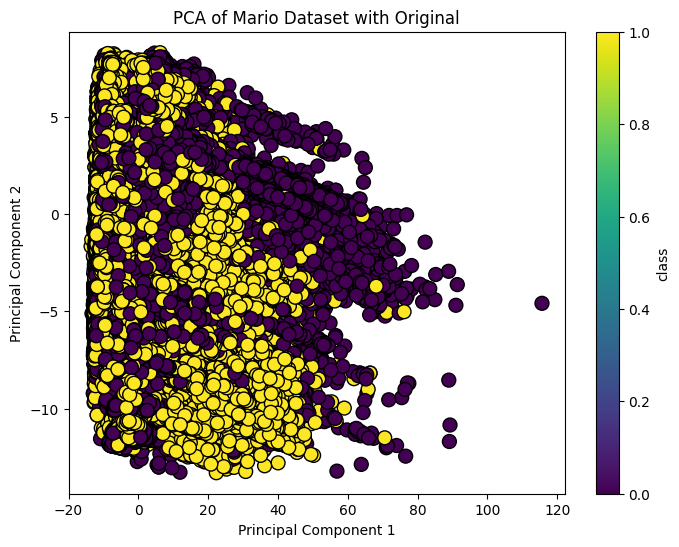

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

X = df_train_cleaned.drop('class', axis=1)
y = df_train_cleaned['class']

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Here, we keep 2 principal components for visualization
X_pca = pca.fit_transform(X)

# Display the amount of variance explained by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 3 Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mario Dataset with Original')
plt.colorbar(label='class')
plt.show()

Explained variance ratio: [0.14760328 0.10964751]


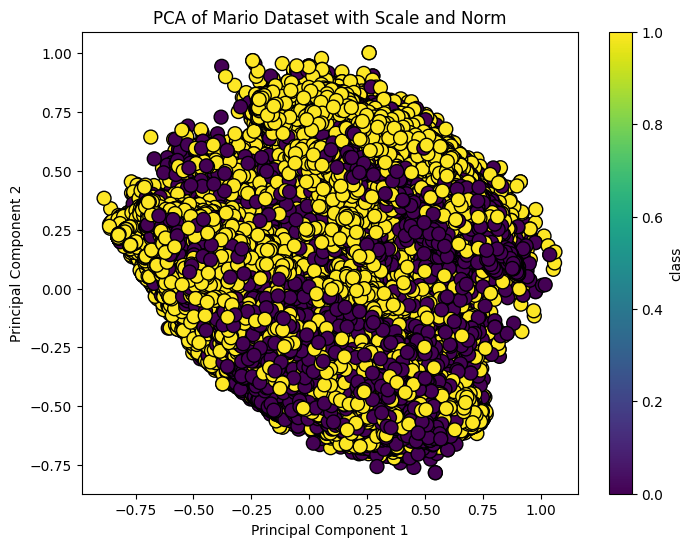

In [35]:
X = df_train_cleaned.drop('class', axis=1)
y = df_train_cleaned['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = normalize(X_scaled)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Here, we keep 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Display the amount of variance explained by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 3 Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mario Dataset with Scale and Norm')
plt.colorbar(label='class')
plt.show()

Explained variance ratio: [0.29432679 0.14139777]


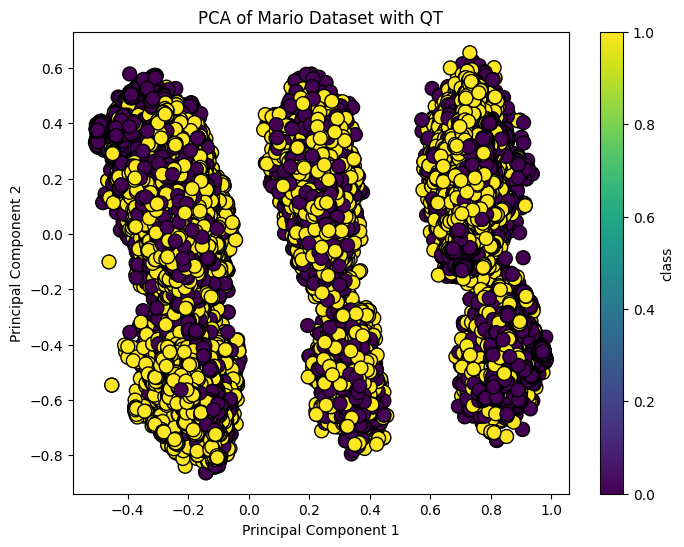

In [36]:
X = df_train_cleaned.drop('class', axis=1)
y = df_train_cleaned['class']

scaler = QuantileTransformer(output_distribution='normal')
X_scaled = scaler.fit_transform(X)
X_scaled = normalize(X_scaled)


# Step 2: Apply PCA
pca = PCA(n_components=2)  # Here, we keep 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Display the amount of variance explained by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 3 Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mario Dataset with QT')
plt.colorbar(label='class')
plt.show()

Explained variance ratio: [0.15795779 0.10874614]


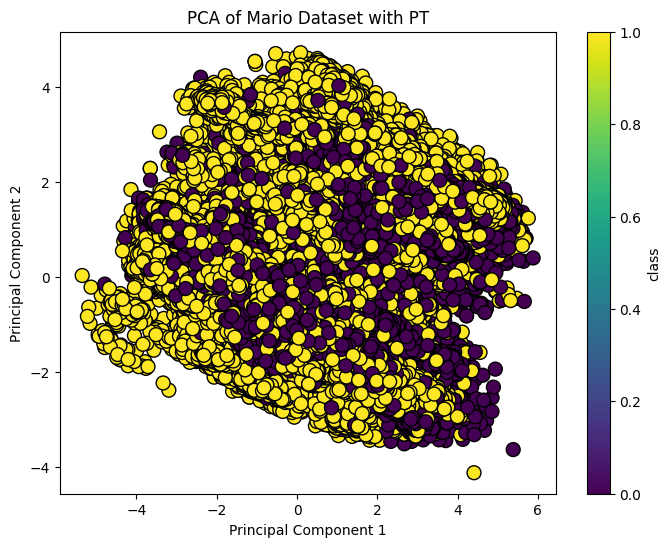

In [37]:
X = df_train_cleaned.drop('class', axis=1)
y = df_train_cleaned['class']

scaler = PowerTransformer()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Here, we keep 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Display the amount of variance explained by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 3 Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mario Dataset with PT')
plt.colorbar(label='class')
plt.show()

In [38]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

# Prepare X and Y
X_train = df_train_cleaned.drop("class", axis=1)
Y_train = df_train_cleaned["class"]

scaler = PowerTransformer()
X_train = scaler.fit_transform(X)

isolation_forest = IsolationForest(contamination=0.024, random_state=42)
outlier_labels = isolation_forest.fit_predict(X_train)

non_outliers_mask = outlier_labels != -1
X_train = X_train[non_outliers_mask]
Y_train = Y_train[non_outliers_mask]

# Prepare X_test
X_test = df_test_cleaned.drop("id", axis=1).copy()
X_test = scaler.transform(X_test)  # Use transform for test data

# # Fit Random Forest model and perform cross-validation
random_forest = RandomForestClassifier()
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Cross-validation predictions
# Y_pred = cross_val_predict(random_forest, X_train, Y_train, cv=skf)

# # Calculate the Matthews Correlation Coefficient
# mcc = matthews_corrcoef(Y_train, Y_pred)

# # Output results
# print("Shape of X_train:", X_train.shape)
# print("Shape of Y_train:", Y_train.shape)
# print("Shape of X_test:", X_test.shape)
# print("Matthews Correlation Coefficient:", mcc)

In [39]:
random_forest.fit(X_train, Y_train)
test_preds = random_forest.predict(X_test)
test_preds = label_encoder.inverse_transform(test_preds)

In [40]:
output = pd.DataFrame({'id': df_test['id'],
                       'class': test_preds})

output.to_csv('submission.csv', index=False)

output.head()

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


In [41]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(Y_train, random_forest.predict(X_train))

np.float64(0.9999681776876362)